In [14]:
import pandas as pd            
import numpy as np              
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [15]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
Y = diabetes['Outcome']
X = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age']]
X_featurenames = X.columns
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [18]:
# Build the model with the random forest regression algorithm:
model = RandomForestClassifier(max_depth = 20, random_state = 0, n_estimators = 100)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [19]:
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred, target_names=["Diabetes -ve", "Diabetes +ve"]))

              precision    recall  f1-score   support

Diabetes -ve       0.81      0.86      0.83        98
Diabetes +ve       0.72      0.64      0.68        56

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



In [20]:
model.feature_importances_

array([0.08008926, 0.25890452, 0.09401633, 0.0714793 , 0.07359155,
       0.16732871, 0.12555214, 0.12903819])

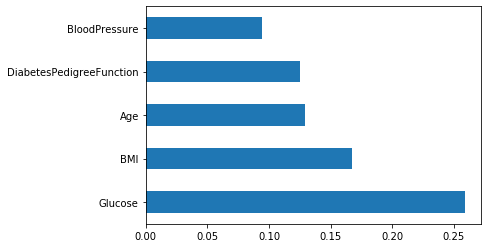

In [21]:
feat_importances = pd.Series(model.feature_importances_, index = X_featurenames)
feat_importances.nlargest(5).plot(kind = 'barh')

In [ ]:
pip install lime

In [22]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names = X_featurenames, 
                                                   class_names = ['Diabetes -ve', 'Diabetes +ve'], 
                                                   feature_selection = "lasso_path",
                                                   discretize_continuous = True, discretizer = "quartile", 
                                                   verbose = True, mode = 'classification')

In [23]:
#For local level explanation let’s pick an observation from test data
X_test.iloc[0:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
727,0,141,84,26,0,32.4,0.433,22
178,5,143,78,0,0,45.0,0.190,47
623,0,94,70,27,115,43.5,0.347,21
36,11,138,76,0,0,33.2,0.420,35
307,0,137,68,14,148,24.8,0.143,21
711,5,126,78,27,22,29.6,0.439,40
429,1,95,82,25,180,35.0,0.233,43
565,2,95,54,14,88,26.1,0.748,22
248,9,124,70,33,402,35.4,0.282,34
230,4,142,86,0,0,44.0,0.645,22


In [24]:
Y_test.iloc[0:10]

727    0
178    0
623    0
36     0
307    0
711    0
429    1
565    0
248    0
230    1
Name: Outcome, dtype: int64

Intercept 0.339547345015617
Prediction_local [0.53632991]
Right: 0.29


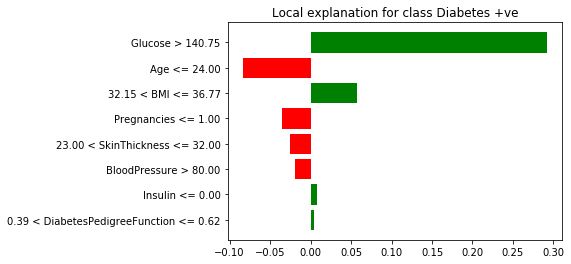

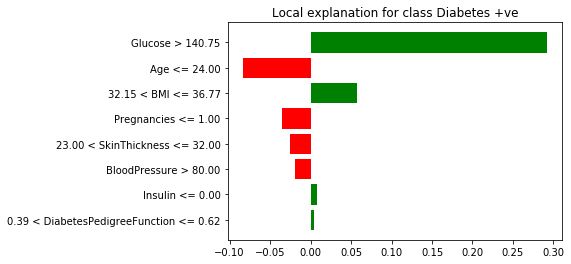

In [27]:
exp = explainer.explain_instance(X_test.iloc[0], model.predict_proba)
exp.as_pyplot_figure()

Intercept 0.3258671163296816
Prediction_local [0.58352934]
Right: 0.53


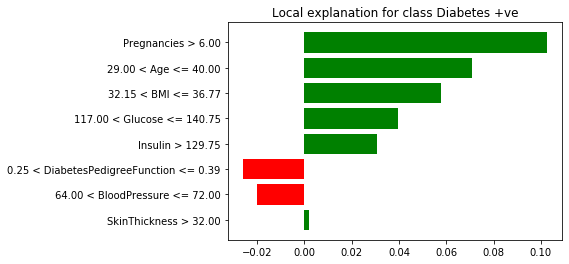

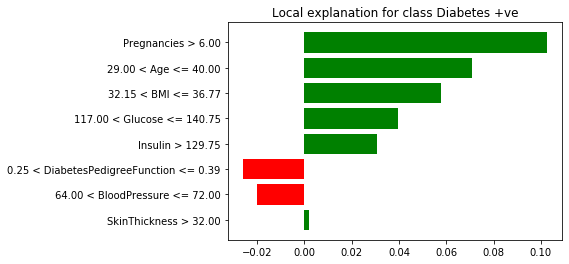

In [28]:
exp = explainer.explain_instance(X_test.iloc[8], model.predict_proba)
exp.as_pyplot_figure()

In [29]:
exp = explainer.explain_instance(X_test.iloc[0], model.predict_proba)
exp.show_in_notebook(show_table = True, show_all = False)

Intercept 0.3376204071707403
Prediction_local [0.53857901]
Right: 0.29


In [30]:
exp = explainer.explain_instance(X_test.iloc[8], model.predict_proba)
exp.show_in_notebook(show_table = True, show_all = False)

Intercept 0.32595619228110073
Prediction_local [0.58625594]
Right: 0.53


# Understanding LIME

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
gray_cmap=LinearSegmentedColormap.from_list('gy',[(.3,.3,.3),(.8,.8,.8)], N=2) 
np.random.seed(222) #Seed for random numbers generation

def set_plot_style():
  plt.axis([-2,2,-2,2])
  plt.xlabel('x1')
  plt.ylabel('x2')

In [2]:
#df = pd.read_csv("https://arteagac.github.io/blog/lime/artificial_data.csv",header = 'infer')
df = pd.read_csv('LIME.csv')
df[0:5]

,x1,x2,y
0,14.48,27.10,0
1,13.83,26.85,0
2,13.18,26.70,0
3,12.53,26.50,0
4,11.58,26.25,0


In [3]:
X = df[['x1','x2']].values
y = df['y'].values
X = (X - np.mean(X,axis=0)) / np.std(X,axis=0) #Standarization of data

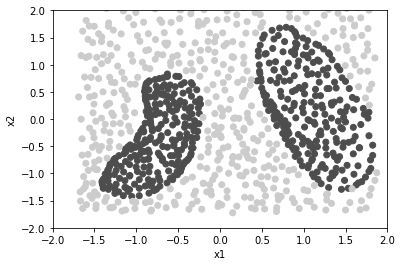

In [4]:
set_plot_style()
plt.scatter(X[:,0],X[:,1], c=y, cmap=gray_cmap)

In [5]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X, y) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

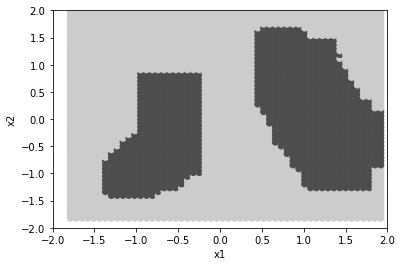

In [6]:
#Function to create a mesh grid
def make_meshgrid(x1, x2, h=.02,x1_min=0,x1_max=0,x2_min=0,x2_max=0):
    if x1_min==0 and x1_max==0 and x2_min==0 and x2_max==0:
        x1_min, x1_max = x1.min() - 0.1, x1.max() + 0.1
        x2_min, x2_max = x2.min() - 0.1, x2.max() + 0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    return np.vstack((xx1.ravel(), xx2.ravel())).T

#Create mesh grid and predict class for each element in mesh grid
XX = make_meshgrid(X[:,0],X[:,1],h=.07)
yy = classifier.predict(XX)

set_plot_style()
plt.scatter(XX[:,0],XX[:,1], c=yy, cmap=gray_cmap)

# LIME

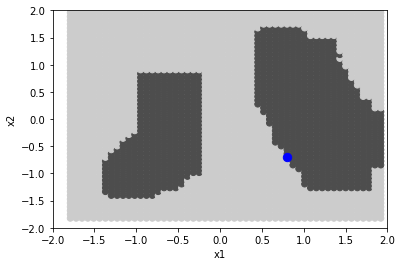

In [7]:
Xi = np.array([0.8,-0.7]) 
set_plot_style()
plt.scatter(XX[:,0],XX[:,1], c=yy, cmap=gray_cmap)
plt.scatter(Xi[0],Xi[1],c="blue",marker="o",s=70 )

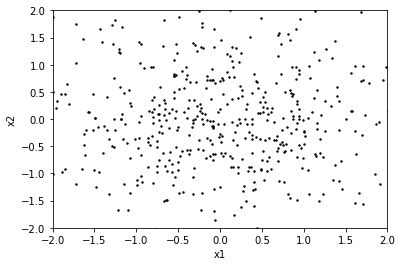

In [8]:
num_perturb = 500
X_lime = np.random.normal(0,1,size=(num_perturb,X.shape[1]))

set_plot_style()
plt.scatter(X_lime[:,0],X_lime[:,1],s=2,c="black")

# Use ML classifier to predict classes of new generated dataset

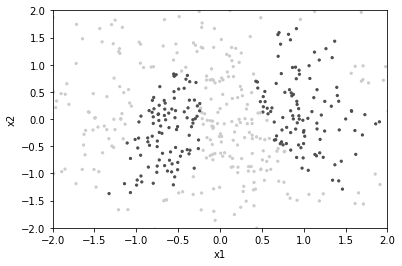

In [9]:
y_lime = classifier.predict(X_lime)
set_plot_style()
plt.scatter(X_lime[:,0],X_lime[:,1],s=5, c=y_lime, cmap=gray_cmap)

# Compute distances between the instance being explained and each perturbation and compute weights (importance) of the generated instances

In [10]:
kernel_width = 0.2
distances = np.sum((Xi - X_lime)**2,axis=1) #Euclidean distance
weights = np.sqrt(np.exp(-(distances**2)/(kernel_width**2))) #Kernel function
weights.shape

(500,)

# Use the new generated dataset (X_lime), its class predictions (y_lime) and their importance (weights) to fit simpler and interpretable (linear) model

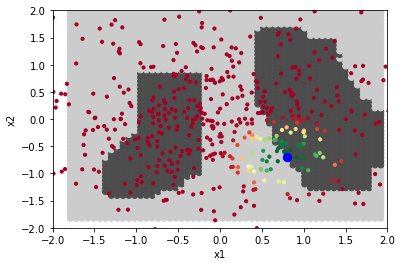

In [11]:
set_plot_style()
plt.scatter(XX[:,0],XX[:,1], c=yy, cmap=gray_cmap) 
plt.scatter(X_lime[:,0],X_lime[:,1],s=10,c= weights,cmap="RdYlGn") 
plt.scatter(Xi[0],Xi[1],c="blue",marker="o",s=70 )

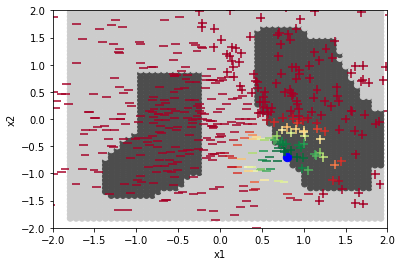

In [12]:
from sklearn.linear_model import LinearRegression
simpler_model = LinearRegression() 
simpler_model.fit(X_lime, y_lime, sample_weight=weights)
y_linmodel = simpler_model.predict(X_lime)
y_linmodel = y_linmodel < 0.5 #Conver to binary class

set_plot_style()
plt.scatter(XX[:,0],XX[:,1], c=yy, cmap=gray_cmap) 
plt.scatter(Xi[0],Xi[1],c="blue",marker="o",s=70 )
plt.scatter(X_lime[y_linmodel==0,0],X_lime[y_linmodel==0,1],c= weights[y_linmodel==0],cmap="RdYlGn",marker="_",s=80)
plt.scatter(X_lime[y_linmodel==1,0],X_lime[y_linmodel==1,1],c= weights[y_linmodel==1],cmap="RdYlGn",marker="+",s=80)

In [13]:
simpler_model.coef_

array([-1.37295625, -0.61209681])

In [ ]:
model.

In [ ]:
# import pickle
# filename_x = 'randomforest.sav'
# pickle.dump(model, open(filename_x, 'wb'))

In [ ]:
# import pandas as pd

In [ ]:
# df = pd.read_csv('https://arteagac.github.io/blog/lime/artificial_data.csv')